In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%run 1.fetch_data_from_github.ipynb
housing = load_housing_data()

In [3]:
# make seperation according to income category
# eg: 0 - 1.5 is class 1

housing["income_cat"] = pd.cut(housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5])

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

# n_splits : number of reshuffling and split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# split and stratified using income category
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [6]:
housing = strat_train_set.copy()

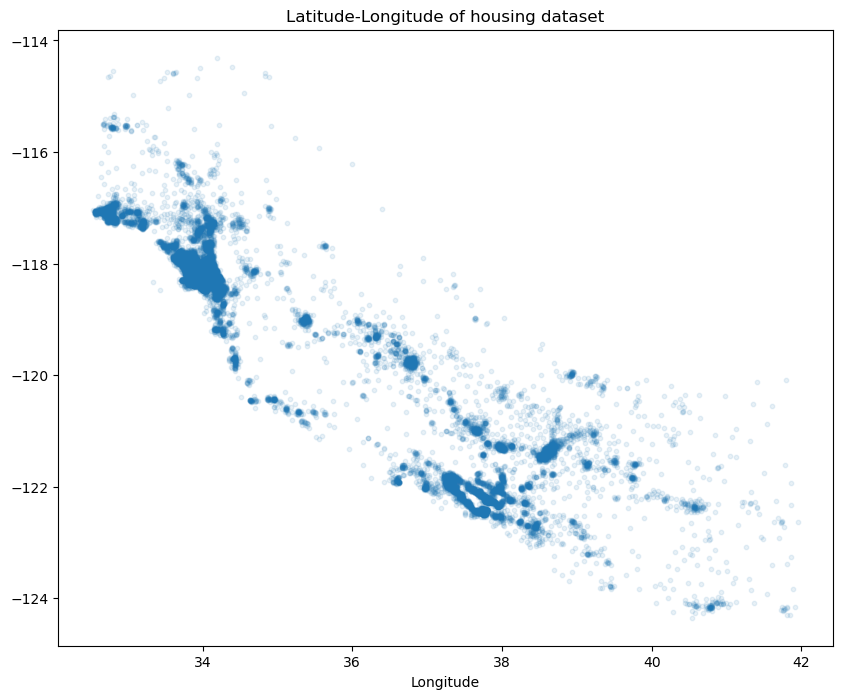

In [21]:
plt.figure(figsize = (10,8))
plt.scatter(housing['latitude'],housing['longitude'], s = 10, alpha = 0.1)
plt.xlabel('Latitude')
plt.xlabel('Longitude')
plt.title('Latitude-Longitude of housing dataset')
plt.show()

- The radius of each circle representsthe district’s population (option s)
- the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue(low values) to red (high prices):16

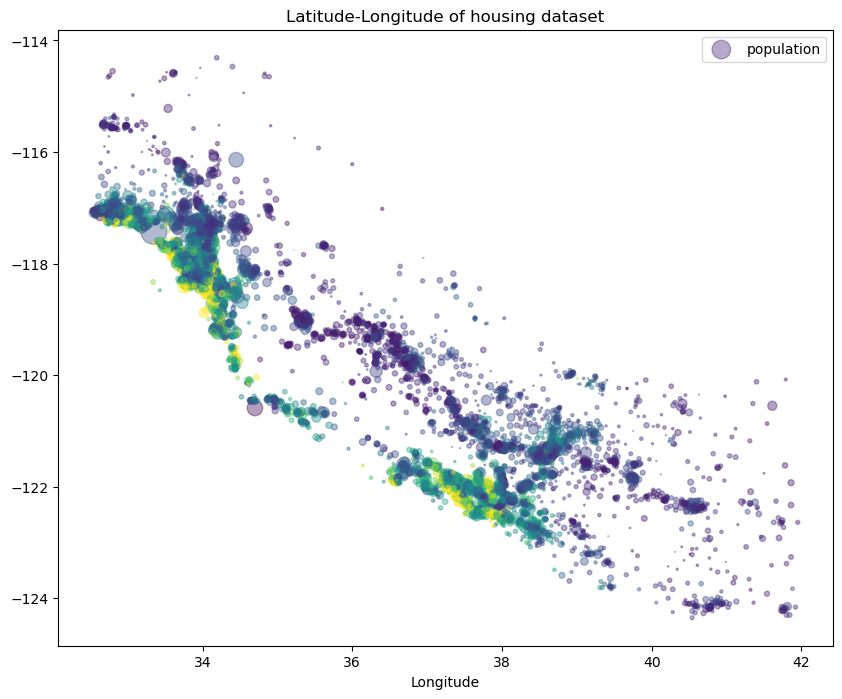

In [33]:
plt.figure(figsize = (10,8))
plt.scatter(housing['latitude'],housing['longitude'], 
            s = housing['population']/100, alpha = 0.4, 
            label = 'population', 
            c = housing['median_house_value'])
plt.xlabel('Latitude')
plt.xlabel('Longitude')
plt.title('Latitude-Longitude of housing dataset')
plt.legend()
plt.show()

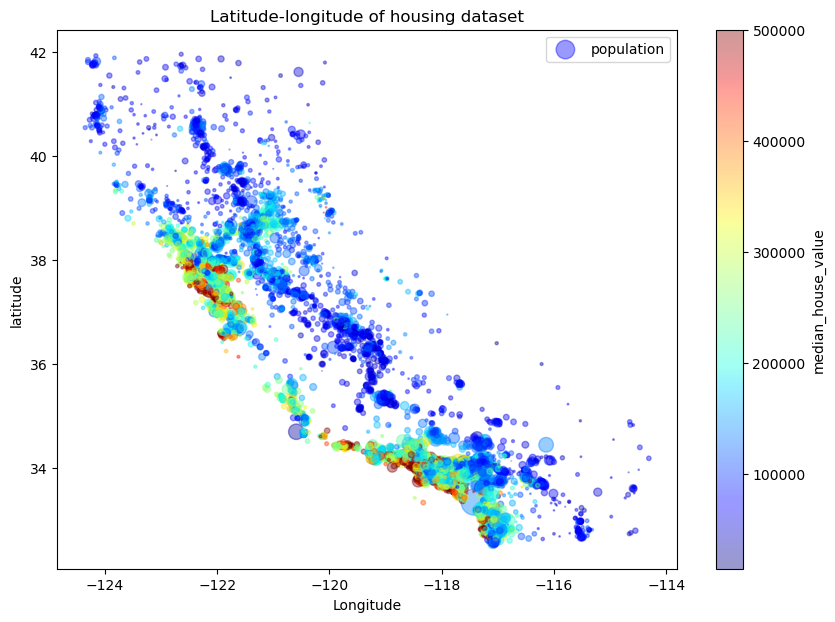

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.xlabel('Latitude')
plt.xlabel('Longitude')
plt.title('Latitude-longitude of housing dataset')
plt.legend()
plt.show()